<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project  4:  Probecard Identification.



---

## Final Project :  Probecard Identification.



### The Objective is to Identify the probe card ID  from a set of 11 test characteristic features. There are 4 probe cards for identification.
### There are 4 probecards with the following test characteristics :


### 1. Freq1  - frequency of interest 1
### 2. Freq2  - frequency of interest 2
### 3. PRR_record - Part Results Record (PRR) of the STDF version
### 4. Temp_coeff - Temperature Coefficient
### 5. Test_time - Total test time of the tested device
### 6. Power_supply -  Power supply current 
### 7. Propagation_delay - Propagation delay of a unknown parameter
### 8. Rise_time - Rise time of the digital pin X
### 9. Fall_time - Fall time of the digital pin X
### 10. Resistance  - Resistance measurement of component
### 11. Functional - Functional  test parameter
### 12. Probecard - Probecard identity


### There are times when corrupted data occurs during power outrage ,  yielding bits of information  on the following parameters   : Freq1 , Freq2 , power supply current , propagation delay , Rise time, Fall time and resistance to establish the identity of the proe card. There are 4 different probecards in production use.

### Goals and success metrics is to establish the identity of the probe card. Check for  any correlation or dependency  between the test parameters .

### In this project, I will using the following linear transformation techniques to establish the probecard identity and gauge the performance  :
### A) K-Nearest-Neighbors (KNN).
### B) Multinomial Logistic Regression with no dimensional reduction feature.
### C) Multinomial Logistic Regression with Principal Component Analysis.
### D) Multinomial Logistic Regression with Linear Discrimination Analysis







# Data Preparation
Calculating & Removing Outliers

Missing Data in Pandas DataFrames

Filtering inappropriate values

Finding duplicate rows



In [60]:
import numpy as np
import pandas as pd
import ast
import csv
from sklearn.preprocessing import scale, label_binarize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV
from sklearn import model_selection, metrics , datasets, linear_model, decomposition
from sklearn.metrics import roc_curve, auc,  confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


classification_report

from sklearn.pipeline import Pipeline



# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv("Probecard_master_list.csv")
features = ['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Propagation_delay','Rise_time','Fall_time','Resistance','Functional']


df.columns = ['Probecard','Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Propagation_delay','Rise_time','Fall_time','Resistance','Functional']

df_probecard = df['Probecard']
dfx = df[features]

df1 = df.drop(["Probecard"],axis=1)

## Dataset features : 

### ['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Propagation_delay','Rise_time','Fall_time','Resistance','Functional']



In [61]:
df1.tail()

,Freq1,Freq2,PRR_record,Temp_coeff,Test_time,Power_supply,Propagation_delay,Rise_time,Fall_time,Resistance,Functional
3995,15.50,15.34,1121,23.4,2.79,14.25,2.38,256,243,1.805,506.163
3996,13.10,14.98,1124,22.8,2.54,14.05,1.87,277,222,1.959,527.740
3997,17.53,11.64,1121,24.3,2.11,15.64,4.32,208,289,1.607,459.666
3998,20.10,11.23,1121,24.6,1.67,16.60,4.91,189,311,1.486,439.228
3999,14.01,15.05,1124,23.2,2.60,13.43,1.85,273,226,1.809,523.493


## Dataset Target :
### PC01 , PC02 , PC03 , PC04


In [62]:
print (set(df.Probecard))

{'PC01', 'PC04', 'PC03', 'PC02'}


## Drop duplicates if there is any


In [63]:
df.drop_duplicates(keep='last', inplace = True)

## Check for null data

Check if there is any null data

In [64]:
df.isnull().sum()

Probecard            0
Freq1                0
Freq2                0
PRR_record           0
Temp_coeff           0
Test_time            0
Power_supply         0
Propagation_delay    0
Rise_time            0
Fall_time            0
Resistance           0
Functional           0
dtype: int64

## Info of the Data Set


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
Probecard            4000 non-null object
Freq1                4000 non-null float64
Freq2                4000 non-null float64
PRR_record           4000 non-null int64
Temp_coeff           4000 non-null float64
Test_time            4000 non-null float64
Power_supply         4000 non-null float64
Propagation_delay    4000 non-null float64
Rise_time            4000 non-null int64
Fall_time            4000 non-null int64
Resistance           4000 non-null float64
Functional           4000 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 406.2+ KB


## Shape of the Data Set
### [4000,12]


In [66]:
df.shape

(4000, 12)

In [67]:
df.describe()

,Freq1,Freq2,PRR_record,Temp_coeff,Test_time,Power_supply,Propagation_delay,Rise_time,Fall_time,Resistance,Functional
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,13.488410,14.993922,1121.736500,23.50040,2.445788,15.002043,2.552428,286.993500,212.006250,1.680002,25.001010
std,3.163932,1.964082,1.291311,1.37611,0.716829,2.320909,1.652979,49.783708,42.545202,0.252046,315.540934
min,2.610000,7.540000,1121.000000,16.30000,-1.010000,1.320000,-4.580000,87.000000,24.000000,0.687000,-475.892000
25%,11.407500,13.850000,1121.000000,22.70000,2.010000,14.037500,1.580000,258.000000,198.000000,1.549000,-250.536000
50%,13.040000,15.340000,1121.000000,23.50000,2.440000,15.010000,2.550000,298.000000,200.000000,1.740000,-50.004500
75%,15.540000,16.380000,1121.000000,24.30000,2.890000,15.990000,3.520000,308.000000,224.250000,1.856000,291.532000
max,25.140000,21.150000,1124.000000,30.10000,5.710000,28.620000,9.350000,476.000000,411.000000,2.317000,676.007000


## Check for missing data

### Check if there is any missing data

In [68]:
df_no_missing = df.dropna()
df_no_missing
df_no_missing.shape

(4000, 12)

## Boxplot of Freq1 versus Probecard


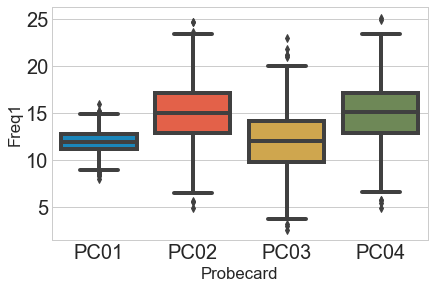

In [69]:
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(x="Probecard",y="Freq1",data=df)

## Boxplot of Resistance versus Probecard


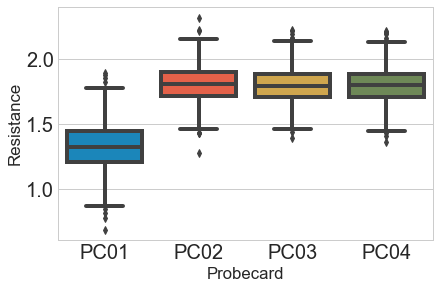

In [70]:
sns.boxplot(x="Probecard",y="Resistance",data=df)

## Boxplot of Rise_time versus Probecard


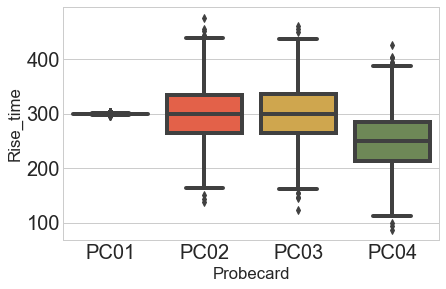

In [71]:
sns.boxplot(x="Probecard",y="Rise_time",data=df)

## Pairplot  
### Features Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply' 
### Target 'Probecard'


Text(0.5,1,'Pairplot of data feature - part 1')

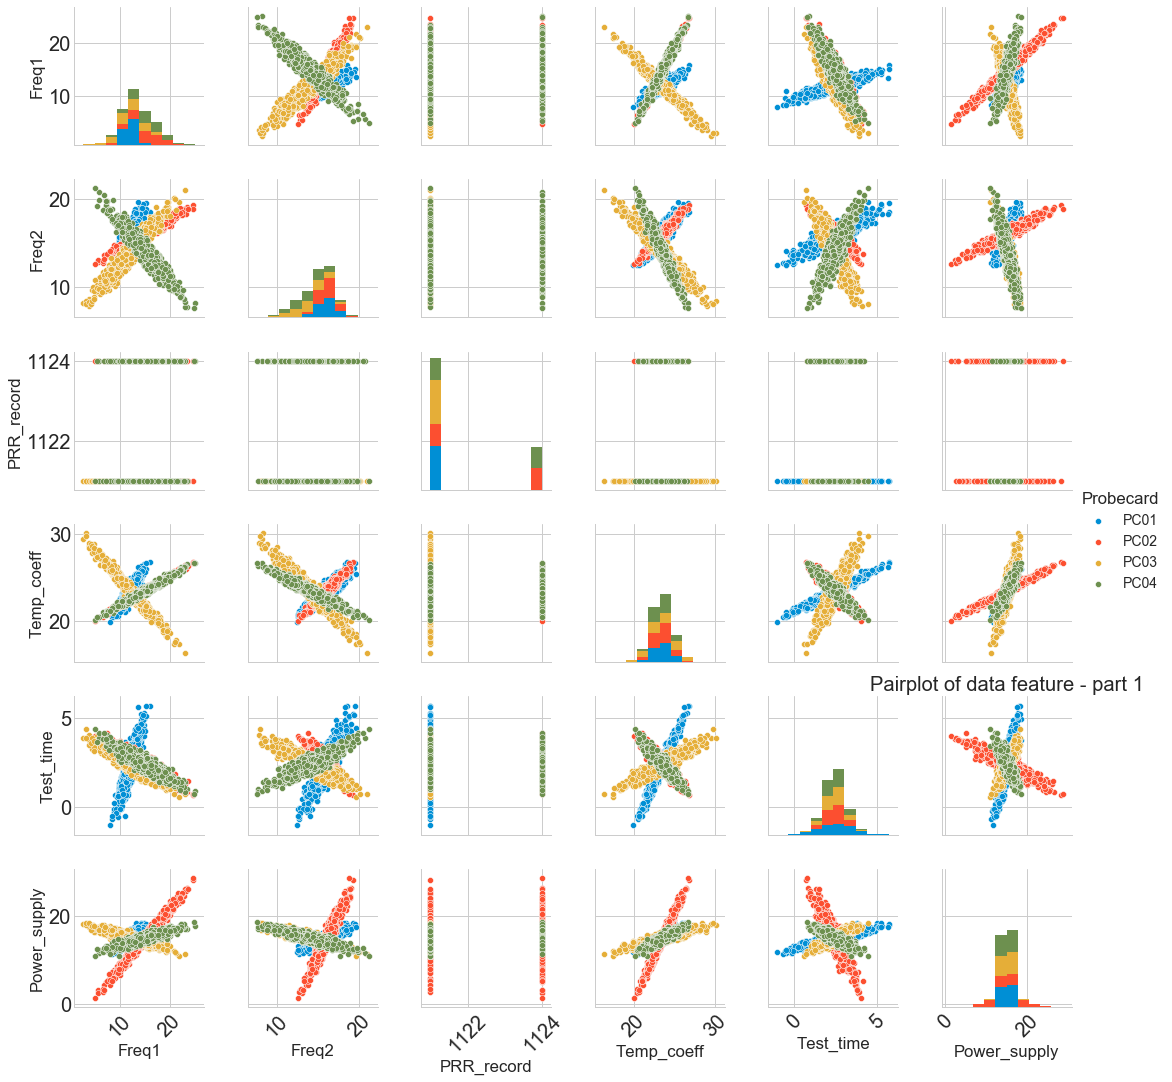

In [72]:

g = sns.pairplot(df[['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Probecard']],hue="Probecard",diag_kind="hist")
for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )
plt.title('Pairplot of data feature - part 1')

## Pairplot  
### Features 'Propagation_delay','Rise_time','Fall_time','Resistance','Functional'
### Target 'Probecard'


Text(0.5,1,'Pairplot of data feature - part 2')

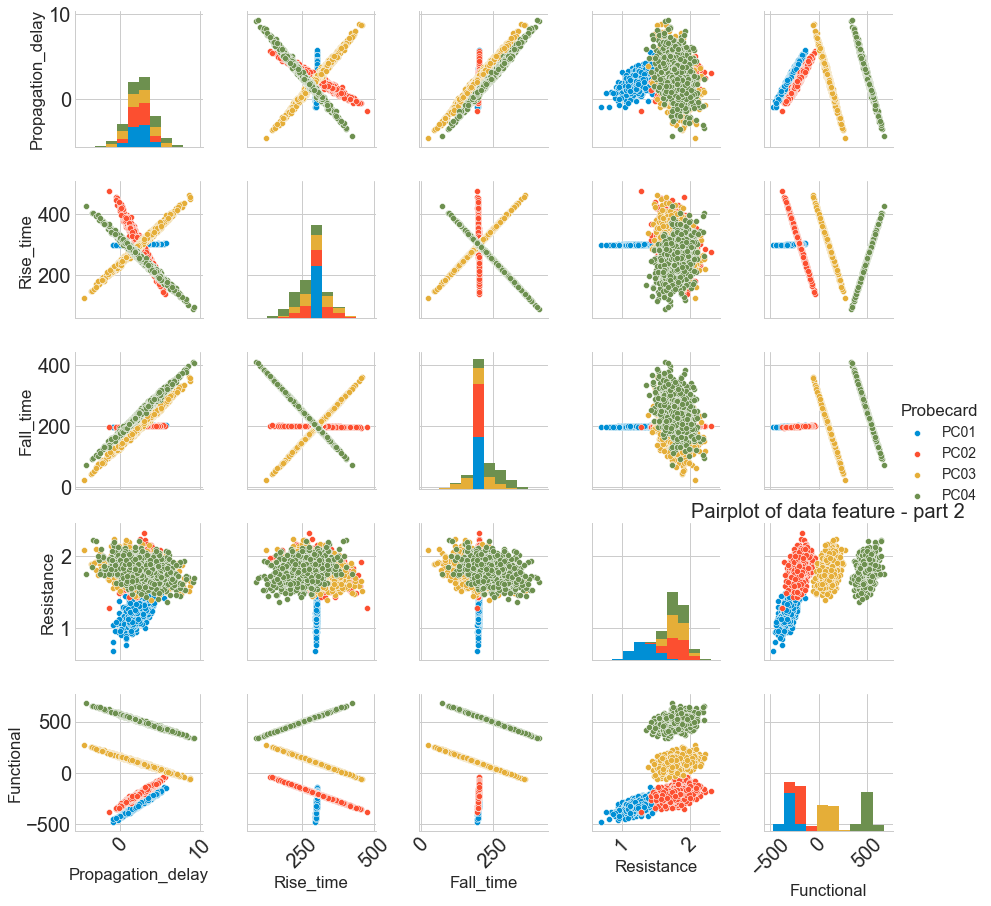

In [73]:

g = sns.pairplot(df[['Propagation_delay','Rise_time','Fall_time','Resistance','Functional','Probecard']],hue="Probecard",diag_kind="hist")

for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )
plt.title('Pairplot of data feature - part 2')

## Removal of unique outlier (maximum outlier) .




In [74]:
#totsl_features = 
df.iloc[0:0]
#print (total_features)
for i,x in enumerate(df.iloc[0:0]):
   
    dummy_max = df.loc[df[x] == df[x].max()]
    if (len(dummy_max)==1) :
        print ("The  unique MAX value for ",x , "is " , df[x].max() , " found at index : ",dummy_max.index[0]," \n")
        #print (dummy_max,"\n")
        #shd.drop(703, inplace = True)
        
        
        df.drop(dummy_max.index[0], inplace = True )
        #print (df.shape)
    else :
        print ( "There is no unique MAX value for ", x ,"\n")


There is no unique MAX value for  Probecard 

The  unique MAX value for  Freq1 is  25.14  found at index :  3644  

The  unique MAX value for  Freq2 is  21.15  found at index :  3554  

There is no unique MAX value for  PRR_record 

The  unique MAX value for  Temp_coeff is  30.1  found at index :  2644  

The  unique MAX value for  Test_time is  5.71  found at index :  644  

The  unique MAX value for  Power_supply is  28.62  found at index :  1677  

The  unique MAX value for  Propagation_delay is  9.35  found at index :  3677  

The  unique MAX value for  Rise_time is  476  found at index :  1554  

The  unique MAX value for  Fall_time is  398  found at index :  3142  

The  unique MAX value for  Resistance is  2.3169999999999997  found at index :  1322  

The  unique MAX value for  Functional is  654.69  found at index :  3392  



## Removal of unique outlier (minimum outlier) .



In [75]:
#totsl_features = 
df.iloc[0:0]
#print (total_features)
for i,x in enumerate(df.iloc[0:0]):
   
    dummy_min = df.loc[df[x] == df[x].min()]
    if (len(dummy_min)==1) :
        print ("The  unique MIN value for ",x , "is " , df[x].min() , " found at index : ",dummy_min.index[0]," \n")


       
        df.drop(dummy_min.index[0], inplace = True )
        
    else :
        print ( "There is no unique MAX value for ", x ,"\n")

There is no unique MAX value for  Probecard 

The  unique MIN value for  Freq1 is  2.61  found at index :  2142  

The  unique MIN value for  Freq2 is  7.69  found at index :  3211  

There is no unique MAX value for  PRR_record 

The  unique MIN value for  Temp_coeff is  16.3  found at index :  2554  

The  unique MIN value for  Test_time is  -1.01  found at index :  554  

The  unique MIN value for  Power_supply is  2.33  found at index :  1508  

The  unique MIN value for  Propagation_delay is  -3.59  found at index :  2392  

The  unique MIN value for  Rise_time is  114  found at index :  3727  

The  unique MIN value for  Fall_time is  47  found at index :  2508  

The  unique MIN value for  Resistance is  0.774  found at index :  763  

The  unique MIN value for  Functional is  -454.69199999999995  found at index :  392  



## Calculating and Removing Outliers

### Standard Deviations:  Removal of  outlier for the features and keep  95 percent of the data  within 1.96 standard deviations

In [76]:
copydf_sd  =  df

copydf_sd.shape
for i,x in enumerate(features):
    stdX  =  df[(x)].std()
    meanX =  df[x].mean()
    topX  =  meanX  +  stdX  *  1.95
    botX  =  meanX -  stdX  *  1.95

    #copydf  =  X

    copydf_sd  = copydf_sd.drop(copydf_sd[copydf_sd[x]>  topX].index)
    copydf_sd  = copydf_sd.drop(copydf_sd[copydf_sd[x]<  botX].index)
    copydf_sd = copydf_sd.sort_values(by=[x])
    print ("The shape of copydf after   ",x,"  using standard deviation    removal is  ", copydf_sd.shape)

copydf_sd.shape


The shape of copydf after    Freq1   using standard deviation    removal is   (3746, 12)
The shape of copydf after    Freq2   using standard deviation    removal is   (3661, 12)
The shape of copydf after    PRR_record   using standard deviation    removal is   (3661, 12)
The shape of copydf after    Temp_coeff   using standard deviation    removal is   (3551, 12)
The shape of copydf after    Test_time   using standard deviation    removal is   (3376, 12)
The shape of copydf after    Power_supply   using standard deviation    removal is   (3176, 12)
The shape of copydf after    Propagation_delay   using standard deviation    removal is   (3143, 12)
The shape of copydf after    Rise_time   using standard deviation    removal is   (3119, 12)
The shape of copydf after    Fall_time   using standard deviation    removal is   (3053, 12)
The shape of copydf after    Resistance   using standard deviation    removal is   (2902, 12)
The shape of copydf after    Functional   using standard deviati

(2902, 12)

## Final Dataset after the data preparation
### Data is  balance among the 4 probecards.


In [77]:
copydf_sd.groupby('Probecard').Probecard.count()

Probecard
PC01    662
PC02    714
PC03    778
PC04    748
Name: Probecard, dtype: int64

In [78]:
probecard_names= ['PC01','PC02','PC03','PC04']

print (probecard_names)

probecard_dict={x:i for i,x in enumerate(probecard_names)}
copydf_sd['Probecard_num']=copydf_sd.apply(lambda row: probecard_dict[row.Probecard] , axis=1)
X=scale(copydf_sd.drop(['Probecard','Probecard_num'],axis=1))

Orig_X = copydf_sd.drop(['Probecard','Probecard_num'],axis=1)
print (Orig_X.shape)
Orig_y = copydf_sd['Probecard']
y=copydf_sd['Probecard_num']
print (Orig_y.shape)


['PC01', 'PC02', 'PC03', 'PC04']
(2902, 11)
(2902,)


## Pairplot  of the revised dataset
### Features Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply' 
### Target 'Probecard'


Text(0.5,1,'Pairplot of data feature - part 1')

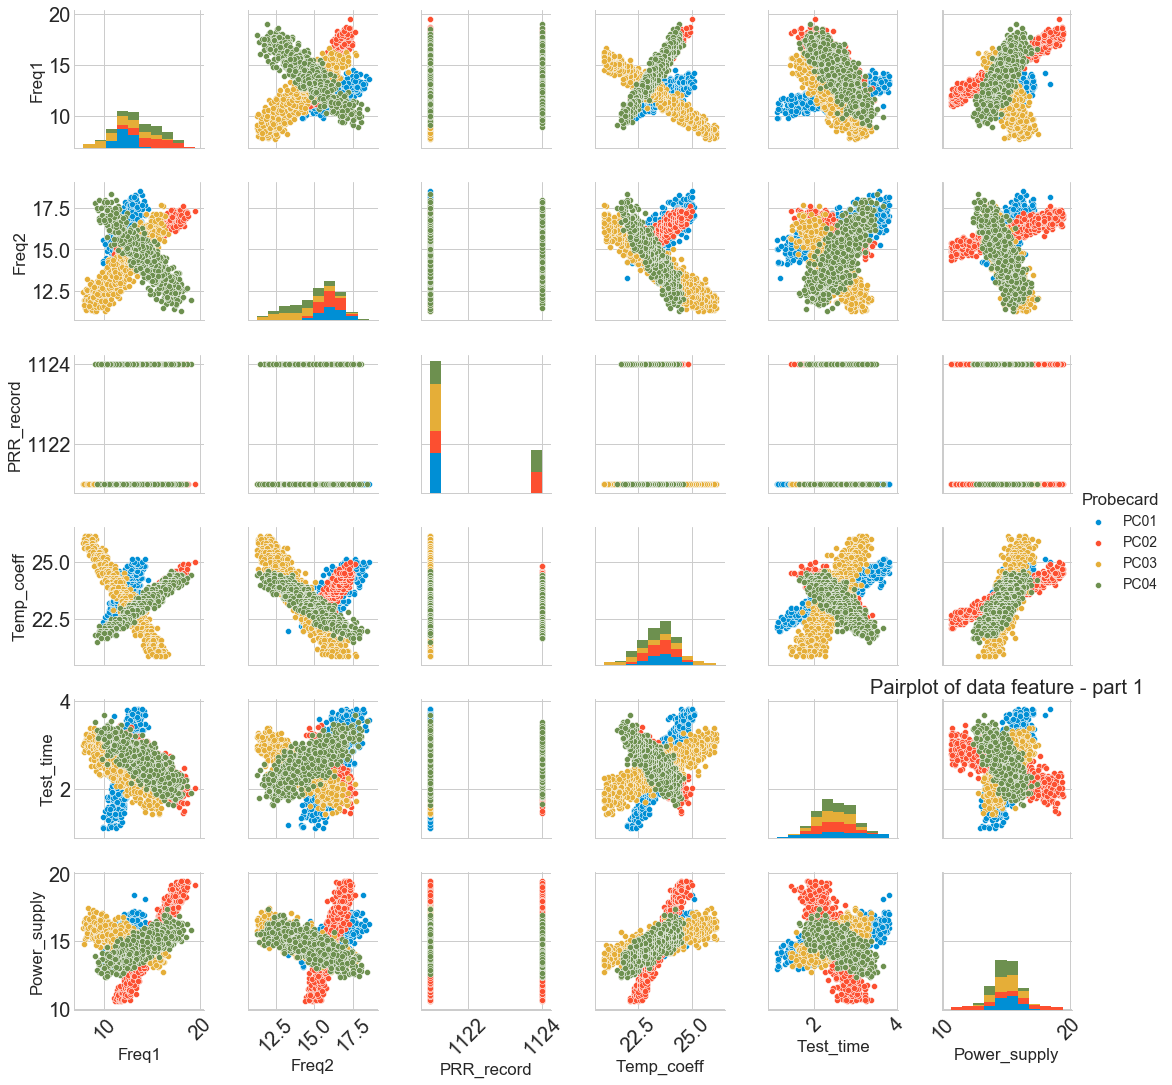

In [79]:
g = sns.pairplot(copydf_sd[['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Probecard']],hue="Probecard",diag_kind="hist")
for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )
        
plt.title('Pairplot of data feature - part 1')

## Pairplot   of the revised dataset
### Features 'Propagation_delay','Rise_time','Fall_time','Resistance','Functional'
### Target 'Probecard'


Text(0.5,1,'Pairplot of data feature - part 2')

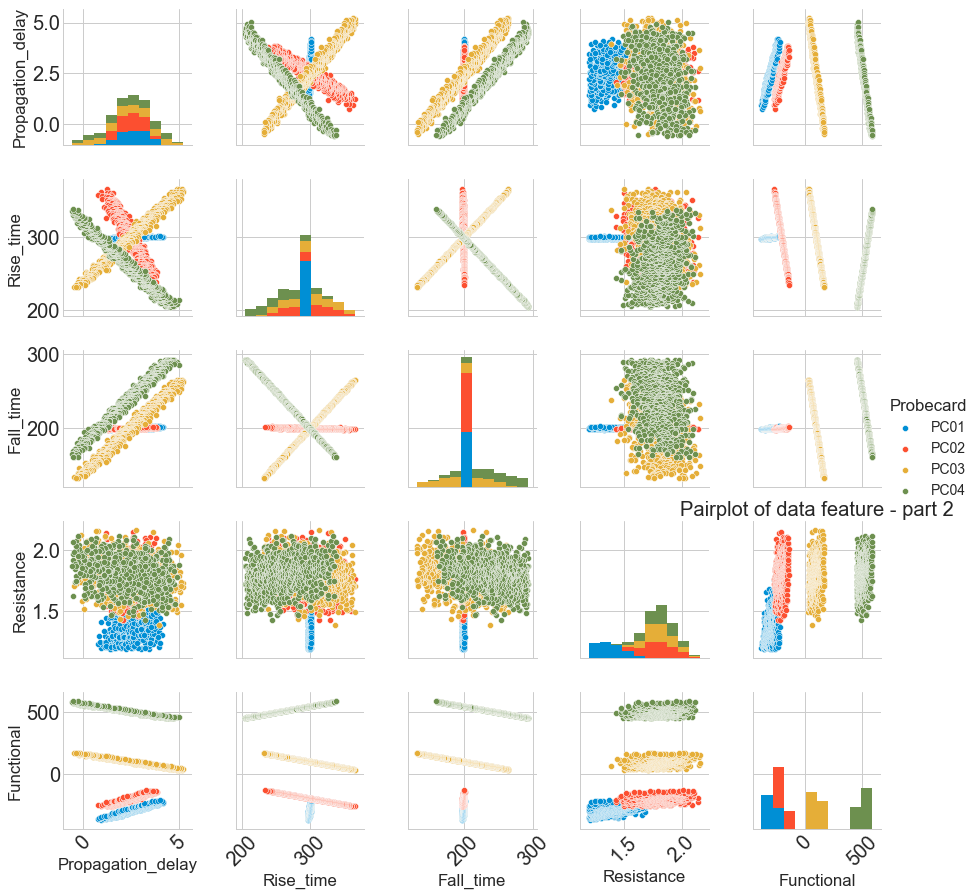

In [80]:
g = sns.pairplot(copydf_sd[['Propagation_delay','Rise_time','Fall_time','Resistance','Functional','Probecard']],hue="Probecard",diag_kind="hist")
for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )
plt.title('Pairplot of data feature - part 2')

In [81]:


print (probecard_names)

probecard_dict={x:i for i,x in enumerate(probecard_names)}
copydf_sd['Probecard_num']=copydf_sd.apply(lambda row: probecard_dict[row.Probecard] , axis=1)
X=copydf_sd.drop(['Probecard','Probecard_num'],axis=1)


feature_names= set(copydf_sd['Probecard'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X = StandardScaler(X)
X.corr(method='pearson')

y=copydf_sd['Probecard']
y = np.ravel(y)
y.shape
X.shape
print (probecard_dict.items())

['PC01', 'PC02', 'PC03', 'PC04']
dict_items([('PC01', 0), ('PC02', 1), ('PC03', 2), ('PC04', 3)])


## Heatmap of the correlation data .


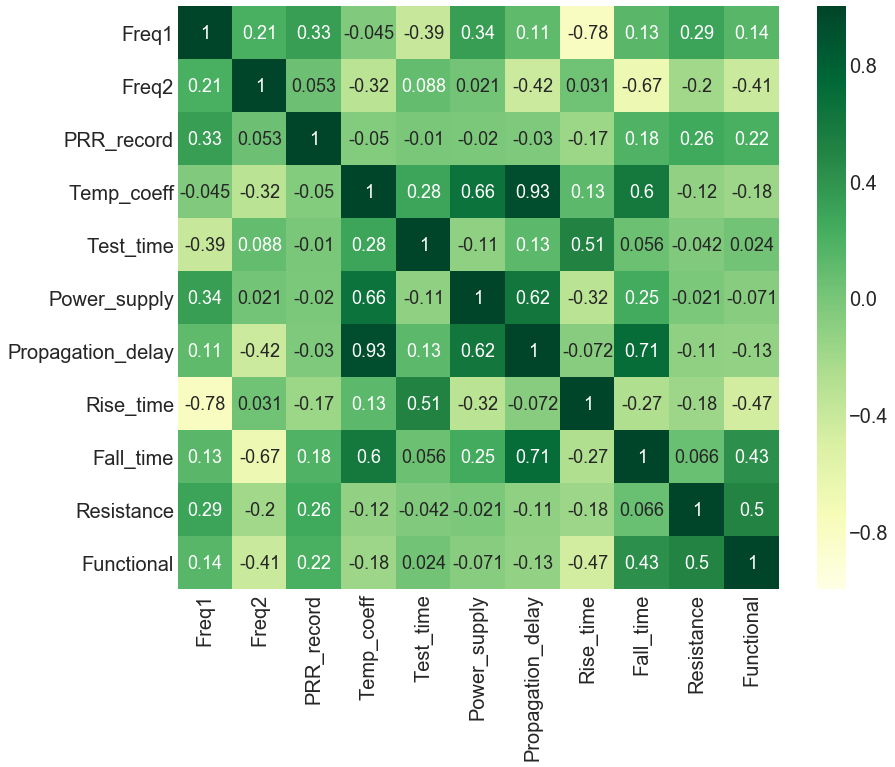

In [82]:
plt.figure(figsize=(12,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 



plt.rcParams.update({'font.size': 18})

sns.heatmap(X.corr(),annot=True, cmap="YlGn", vmin=-1, vmax=1)

## Table of the data feature pairs that have the  top 20 correlation coefficients .


In [83]:
def correlation_result(df2, no_of_feature_request):
  
    corr_matrix = df2.corr()
    # set the correlations on the diagonal or lower triangle to zero, # so they will not be reported as the highest ones:
    corr_matrix *= np.tri(*corr_matrix.values.shape, k=-1).T

    corr_matrix = corr_matrix.stack()
    corr_matrix = corr_matrix.reindex(corr_matrix.abs().sort_values(ascending=False).index).reset_index() # assign human-friendly names
    corr_matrix.columns = ["FirstVariable", "SecondVariable", "Correlation"] 
    return corr_matrix.head(no_of_feature_request)
X1 = pd.DataFrame(X, index=X.index, columns=X.columns)



correlation_result(df, 20)

,FirstVariable,SecondVariable,Correlation
0,Temp_coeff,Propagation_delay,0.943477
1,Freq1,Rise_time,-0.881096
2,Propagation_delay,Fall_time,0.808818
3,Freq2,Fall_time,-0.772874
4,Temp_coeff,Fall_time,0.689737
5,Temp_coeff,Power_supply,0.675619
6,Power_supply,Propagation_delay,0.628647
7,Test_time,Rise_time,0.572365
8,Resistance,Functional,0.521730
9,Freq2,Propagation_delay,-0.504400


## Positive correlation between Temp Coeff and Propagation delay


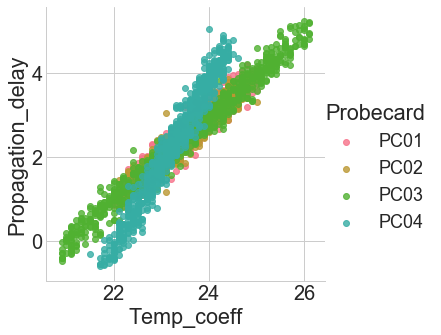

In [84]:
import seaborn as sns
sns.set_palette("husl")
sns.lmplot("Temp_coeff", "Propagation_delay", copydf_sd, hue="Probecard", fit_reg=False)


## Negative correlation between Freq1 and Rise Time


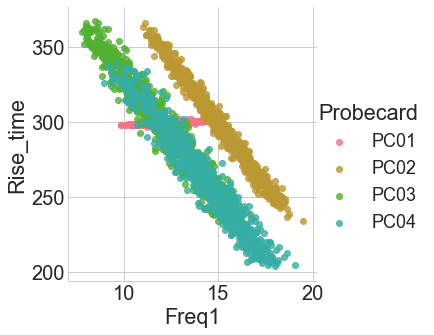

In [85]:
import seaborn as sns
sns.set_palette("husl")
sns.lmplot("Freq1", "Rise_time", copydf_sd, hue="Probecard", fit_reg=False)



## Correlation table of the  chosen data features .
### Positive corr is shown in green while negative corr is shown in red.


In [86]:
selected_indep_variables = ["Temp_coeff","Freq1","Propagation_delay","Freq2","Test_time","Resistance","Power_supply"]
X = copydf_sd[selected_indep_variables]
corr = X.corr()
cmap=sns.diverging_palette(0, 120, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "11pt")]),
            dict(selector="td",
                 props=[('padding', " 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "11pt")]),
            dict(selector="th:hover td:hover",
                 props=[('max-width', '12px'),
                        ('font-size', '11pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '50px', 'font-size': '12pt'})\
    .set_caption("CORR DATA ")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Temp_coeff,Freq1,Propagation_delay,Freq2,Test_time,Resistance,Power_supply
Temp_coeff,1,-0.045,0.93,-0.32,0.28,-0.12,0.66
Freq1,-0.045,1,0.11,0.21,-0.39,0.29,0.34
Propagation_delay,0.93,0.11,1,-0.42,0.13,-0.11,0.62
Freq2,-0.32,0.21,-0.42,1,0.088,-0.2,0.021
Test_time,0.28,-0.39,0.13,0.088,1,-0.042,-0.11
Resistance,-0.12,0.29,-0.11,-0.2,-0.042,1,-0.021
Power_supply,0.66,0.34,0.62,0.021,-0.11,-0.021,1


## Generate X_train , X_test , y_train and y_test for linear transformation


In [87]:

selected_indep_variables = ["Temp_coeff","Freq1","Propagation_delay","Freq2","Test_time","Resistance","Power_supply"]
X = copydf_sd[selected_indep_variables]
X_normalised =  (scale(X))
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y,test_size=0.5, random_state=99) 
X_train2 = X_train1 = X_train
y_train2 = y_train1 = y_train
X_test2 = X_test1 = X_test
y_test2 = y_test1 = y_test
print (y_test1)

['PC02' 'PC03' 'PC03' ... 'PC04' 'PC03' 'PC04']


In [88]:
print (probecard_names)

['PC01', 'PC02', 'PC03', 'PC04']


In [89]:
y4 = [probecard_dict[i] for i in y_train]
print (y4[1:10])
print (y_train[1:10])

[1, 1, 0, 3, 2, 3, 2, 3, 2]
['PC02' 'PC02' 'PC01' 'PC04' 'PC03' 'PC04' 'PC03' 'PC04' 'PC03']


# KNN is a non-parametric and instance based learning algorithm.
## It uses distance measure to make classifciation based on K nearest neighbour.

### 1) train , test and split 
### 2) compute K neighbour values
### 3) use cross_val_score to get the min mse for K value
### 4) plot confusion report to check for balance set
### 5) plot the classification report for overfit and underfit cases




In [90]:
def plot_confusion_matrix(cm, target_names, title='CONFUSION MATRIX', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
def print_confusion_matrix(confusion_matrix, classes_names):
    display(pd.DataFrame(confusion_matrix, index=["Actual " +i for i in classes_names], columns=["Predicted as " + i for i in classes_names]))






### Compute the min mse to establish the optimum K value





In [91]:
print (y_train)

['PC02' 'PC02' 'PC02' ... 'PC03' 'PC02' 'PC01']


The optimal number of neighbors is 61


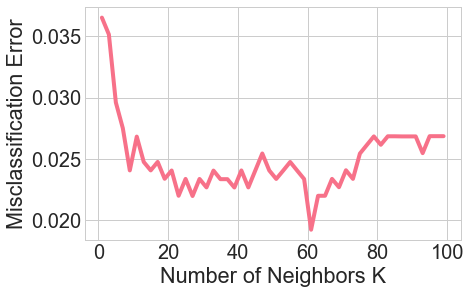

In [92]:
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
myList = list(range(1,100))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [93]:
print (y_train)

['PC02' 'PC02' 'PC02' ... 'PC03' 'PC02' 'PC01']



### Use cross_val_score to get the min mse for K value
### plot confusion report to check for balance set
### plot the classification report for overfit and underfit cases





print KNN accuracy with n_neighbors  on test set  61  is =   97.86%
[[319   0   0   0]
 [  0 346   0   0]
 [  3   0 395   8]
 [  1  15   4 360]]
             precision    recall  f1-score   support

       PC01       0.99      1.00      0.99       319
       PC02       0.96      1.00      0.98       346
       PC03       0.99      0.97      0.98       406
       PC04       0.98      0.95      0.96       380

avg / total       0.98      0.98      0.98      1451



,Predicted as PC01,Predicted as PC02,Predicted as PC03,Predicted as PC04
Actual PC01,319,0,0,0
Actual PC02,0,346,0,0
Actual PC03,3,0,395,8
Actual PC04,1,15,4,360


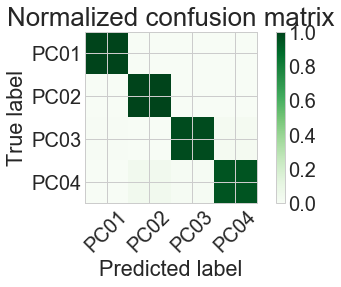

In [94]:


def Knn_model(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    knn_score = metrics.accuracy_score(y_test, y_pred_class)
    print("print KNN accuracy with n_neighbors  on test set ",n, " is =  ", '{:.2f}'.format((knn_score)*100)+"%")
    print (metrics.confusion_matrix(y_test, y_pred_class))
    print (classification_report(y_test, y_pred_class, target_names=probecard_names))
    confusion_mat = metrics.confusion_matrix(y_test, y_pred_class)
    print_confusion_matrix(confusion_mat, probecard_names)
    confusion_mat_normalized = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(confusion_mat_normalized, probecard_names, title='Normalized confusion matrix')


    return (metrics.accuracy_score(y_test, y_pred_class))

knn_score=Knn_model(optimal_k)

# Multinomial Logistic Regression without dimensionality reduction classifier 
## MLR is a logistic regression classification method that used to predict the probabilities of different possible outcomes of a categorically distributed dependent variable given a set of independent variables.


### 1) train , test and split 
### 2) select Logistic Regression to train , predict and score
### 3) use cross_val_score to get the min mse for K value
### 4) plot confusion report to check for balance set
### 5) plot the classification report for overfit and underfit cases
### 6) Compute ROC curve and ROC area for each class


In [95]:
print (y_train)

['PC02' 'PC02' 'PC02' ... 'PC03' 'PC02' 'PC01']


In [96]:
y = copydf_sd['Probecard']
C_parameters = [i for i in range(1,11)]
score_list =[]
for C_parameter in C_parameters :
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    modelCV = LogisticRegression(C=C_parameter)
    scoring = 'accuracy'
    
    results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
    print("10-fold cross validation average accuracy: %.5f" % (results.mean()) , " for C parameter = ", C_parameter)
    score_list.append(results.mean())
print ("\n The best score is :", "{:.2f}".format(max(score_list)*100)+"%" , " with C parameter = ",C_parameters[score_list.index(max(score_list))])


modelCV = LogisticRegression(C=C_parameters[score_list.index(max(score_list))])
modelCV.fit(X_train, y_train)




10-fold cross validation average accuracy: 0.86353  for C parameter =  1
10-fold cross validation average accuracy: 0.86422  for C parameter =  2
10-fold cross validation average accuracy: 0.86284  for C parameter =  3
10-fold cross validation average accuracy: 0.86284  for C parameter =  4
10-fold cross validation average accuracy: 0.86353  for C parameter =  5
10-fold cross validation average accuracy: 0.86353  for C parameter =  6
10-fold cross validation average accuracy: 0.86353  for C parameter =  7
10-fold cross validation average accuracy: 0.86353  for C parameter =  8
10-fold cross validation average accuracy: 0.86353  for C parameter =  9
10-fold cross validation average accuracy: 0.86353  for C parameter =  10

 The best score is : 86.42%  with C parameter =  2


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Use the chosen C-parameter to predict and obtain the score for the test set.





 The test score is :  87.59 % 

             precision    recall  f1-score   support

       PC01       0.97      0.97      0.97       319
       PC02       0.83      0.93      0.88       346
       PC03       0.90      0.84      0.87       406
       PC04       0.82      0.79      0.80       380

avg / total       0.88      0.88      0.88      1451



,Predicted as PC01,Predicted as PC02,Predicted as PC03,Predicted as PC04
Actual PC01,310,2,4,3
Actual PC02,0,322,0,24
Actual PC03,5,22,340,39
Actual PC04,5,43,33,299


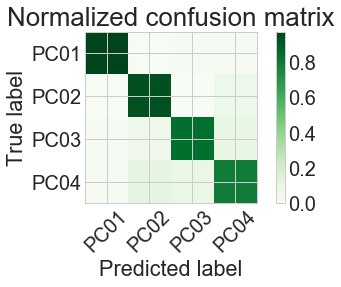

In [97]:
y_pred = modelCV.predict(X_test)
nc_score = modelCV.score(X_test, y_test)
print ( "\n The test score is : ","{:.2f}".format(nc_score*100),"% \n")
confusion_mat = confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print_confusion_matrix(confusion_mat, probecard_names)
confusion_mat_normalized = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(confusion_mat_normalized, probecard_names, title='Normalized confusion matrix')




## ROC curve


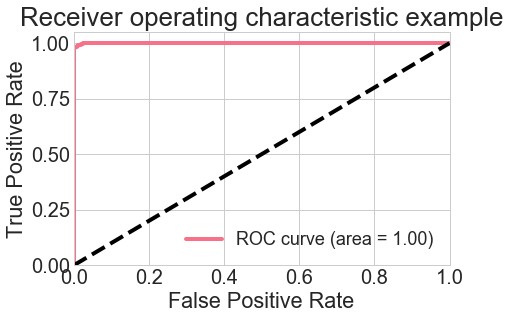

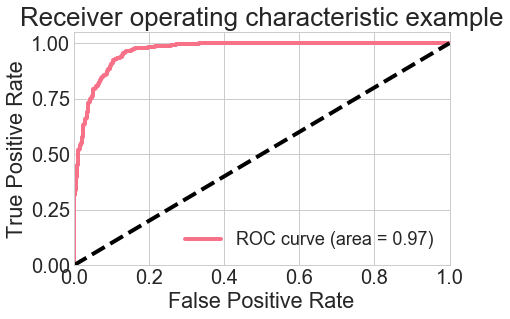

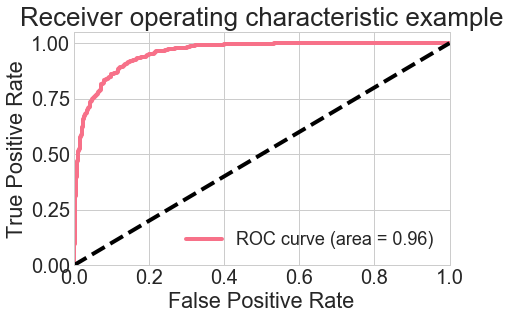

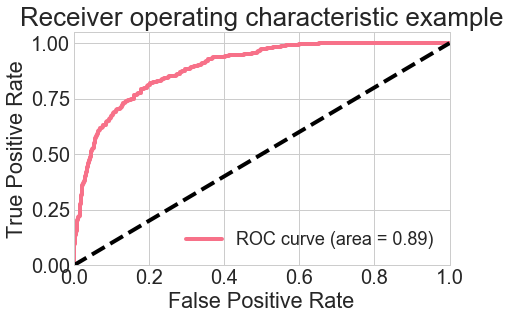

In [98]:
y_train_ordinal = [probecard_dict[i] for i in y_train]
y_test_ordinal = [probecard_dict[i] for i in y_test]
y_train3=label_binarize(y_train_ordinal, classes=[0,1,2,3])
y_test3=label_binarize(y_test_ordinal, classes=[0,1,2,3])

n_classes=4
# classifier
clf = OneVsRestClassifier(LogisticRegression())

y_score = clf.fit(X_train, y_train3).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Multinomial Logistic Regression with PCA as  dimensionality reduction classifier 

### PCA is a  unsupervised technique that finds the directions of maximal variance

### 1) identify the principal component 
### 2) train , test and split 
### 3) select Logistic Regression to train , predict and score
### 4) use cross_val_score to get the min mse for K value
### 5) plot confusion report to check for balance set
### 6) plot the classification report for overfit and underfit cases



## Plotting the PCA principal components 1 to 4




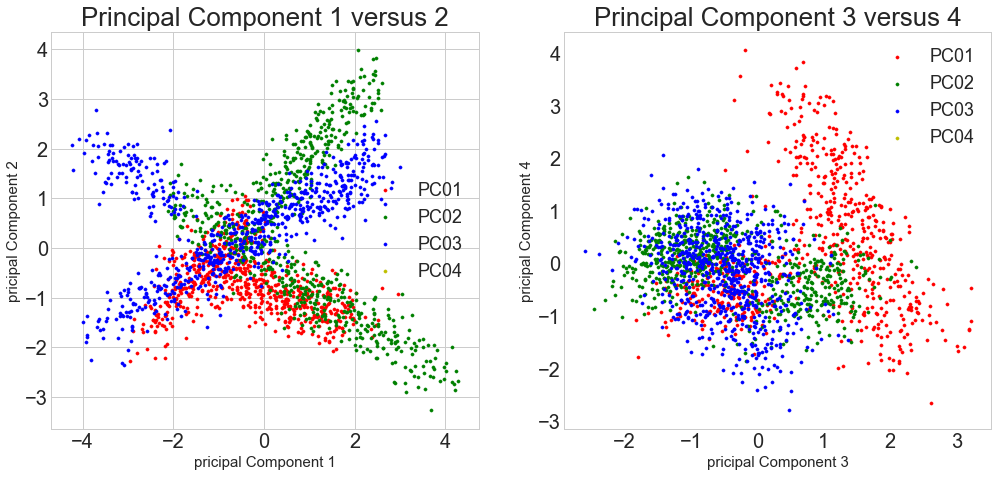

In [99]:

x1 = X_normalised

Y1 = y
pca = PCA(n_components=X_normalised.shape[1])


principalComponents = pca.fit_transform(x1)


principalDf = pd.DataFrame(data = principalComponents
                           , columns =['principal component '+str(i) for i in range(1,X_normalised.shape[1]+1)])

finalDf = pd.concat([principalDf, copydf_sd[['Probecard']]],axis=1 )

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
ax.set_xlabel('pricipal Component 1',fontsize =15)
ax.set_ylabel('pricipal Component 2',fontsize =15)
targets = ['PC01','PC02','PC03','PC04']
colors = [ 'r','g','b','y']
for target , color in zip(targets, colors):
        indicesToKeep = finalDf['Probecard'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 10)
ax.legend(targets)
ax.set_title('Principal Component 1 versus 2')
        
ax = fig.add_subplot(2,2,2)
ax.set_xlabel('pricipal Component 3',fontsize =15)
ax.set_ylabel('pricipal Component 4',fontsize =15)
for target , color in zip(targets, colors):
        indicesToKeep = finalDf['Probecard'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
                   , finalDf.loc[indicesToKeep, 'principal component 4']
                   , c = color
                   , s = 10)
ax.legend(targets)
ax.set_title('Principal Component 3 versus 4')
ax.grid()





## Plotting the variances of the principal components 




[2.63606573 1.64022212 1.21656837 0.91773406 0.39491266 0.16414474
 0.03035231]


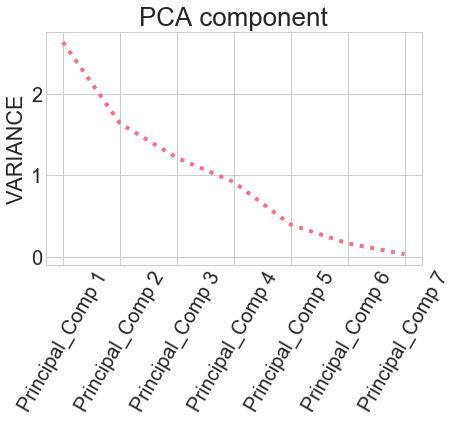

In [100]:
pca = PCA(X_normalised.shape[1])
y_variance = np.std(pca.fit_transform(X_normalised), axis=0)**2 
print (y_variance)

x_principal_component = np.arange(len(y_variance)) +1

plt.plot(x_principal_component, y_variance, ":")
plt.xticks(x_principal_component, ["Principal_Comp "+str(i) for i in x_principal_component], rotation=60) 
plt.ylabel("VARIANCE")
plt.title("PCA component")
plt.show()

## Plotting the principal component coefficients of the independent variables ( data features )




In [101]:
pc_coeff = pca.components_

print ("The principal components coefficient of the data features are as follows : \n")
index_p =  ["principal_component " + str(i)  for i in range(1,len(selected_indep_variables)+1)]

df3 = pd.DataFrame(pca.components_, columns=selected_indep_variables, index = index_p)
df3

The principal components coefficient of the data features are as follows : 



,Temp_coeff,Freq1,Propagation_delay,Freq2,Test_time,Resistance,Power_supply
principal_component 1,0.593713,0.057714,0.595001,-0.247230,0.090828,-0.052727,0.466900
principal_component 2,-0.124827,0.689999,-0.015921,0.135736,-0.538899,0.323983,0.307025
principal_component 3,0.043537,0.107875,-0.033583,0.735564,0.111697,-0.597072,0.274435
principal_component 4,-0.078017,-0.177998,0.049865,-0.334471,-0.690727,-0.606546,-0.053572
principal_component 5,-0.013557,0.633969,0.278738,-0.152889,0.250253,-0.310742,-0.581071
principal_component 6,-0.370305,0.213003,-0.333501,-0.482264,0.382949,-0.257554,0.510606
principal_component 7,-0.697590,-0.173100,0.673193,0.107583,0.049808,0.070479,0.105800


## Perform logistic regression using PCA as dimensional reduction classifier.




In [102]:
from sklearn.svm import SVC
C_parameters = [i for i in range(1,21)]
score_list =[]
y = np.ravel(y)
for C_parameter in C_parameters :
    
    # #############################################################################
    # Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
    # dataset): unsupervised feature extraction / dimensionality reduction
    pca = PCA(n_components=6)
    pca.fit(X_train2)
    X_train2 =(pca.transform(X_train2))
    X_test2 =  (pca.transform(X_test2))
 
    
    kfold = model_selection.KFold(n_splits=10, random_state=99)
    pca_modelCV = LogisticRegression(C=C_parameter)
    scoring = 'accuracy'
    
    results = model_selection.cross_val_score(pca_modelCV, X_train2, y_train2, cv=kfold, scoring=scoring)
    print("10-fold cross validation average accuracy: %.5f" % (results.mean()) , " for C parameter = ", C_parameter)
    score_list.append(results.mean())

print ("\n The best score is :",'{:.2f}'.format(max(score_list)*100)+"%" , " with C parameter = ",C_parameters[score_list.index(max(score_list))])


pca_modelCV = LogisticRegression(C=C_parameters[score_list.index(max(score_list))])
pca_modelCV.fit(X_train2, y_train2)



10-fold cross validation average accuracy: 0.85940  for C parameter =  1
10-fold cross validation average accuracy: 0.85940  for C parameter =  2
10-fold cross validation average accuracy: 0.86354  for C parameter =  3
10-fold cross validation average accuracy: 0.86423  for C parameter =  4
10-fold cross validation average accuracy: 0.86354  for C parameter =  5
10-fold cross validation average accuracy: 0.86492  for C parameter =  6
10-fold cross validation average accuracy: 0.86492  for C parameter =  7
10-fold cross validation average accuracy: 0.86492  for C parameter =  8
10-fold cross validation average accuracy: 0.86492  for C parameter =  9
10-fold cross validation average accuracy: 0.86492  for C parameter =  10
10-fold cross validation average accuracy: 0.86492  for C parameter =  11
10-fold cross validation average accuracy: 0.86492  for C parameter =  12
10-fold cross validation average accuracy: 0.86492  for C parameter =  13
10-fold cross validation average accuracy: 0.86

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Use the chosen C_parameter to predict the test set and obtain the PCA score





 The test score is :  86.70% 

             precision    recall  f1-score   support

       PC01       0.97      0.97      0.97       319
       PC02       0.82      0.92      0.87       346
       PC03       0.89      0.82      0.85       406
       PC04       0.80      0.79      0.80       380

avg / total       0.87      0.87      0.87      1451



,Predicted as PC01,Predicted as PC02,Predicted as PC03,Predicted as PC04
Actual PC01,309,3,4,3
Actual PC02,1,319,0,26
Actual PC03,5,26,331,44
Actual PC04,4,41,36,299


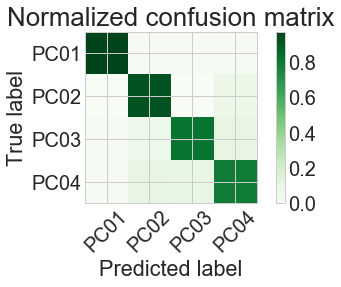

In [103]:

y_pred2 = pca_modelCV.predict(X_test2)
pca_score =  pca_modelCV.score(X_test2, y_test2)
print ( "\n The test score is : ",'{:.2f}'.format(pca_score*100.)+"%" ,"\n")


confusion_mat = confusion_matrix(y_test2, y_pred2)

print(metrics.classification_report(y_test2, y_pred2))
  
print_confusion_matrix(confusion_mat, probecard_names)
confusion_mat_normalized = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(confusion_mat_normalized, probecard_names, title='Normalized confusion matrix')



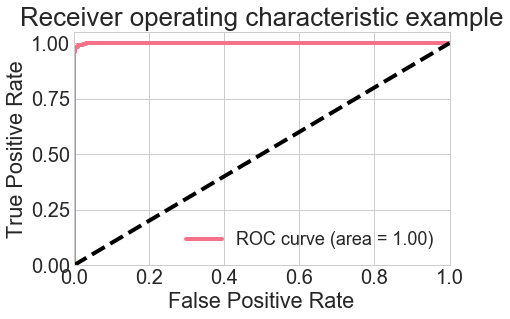

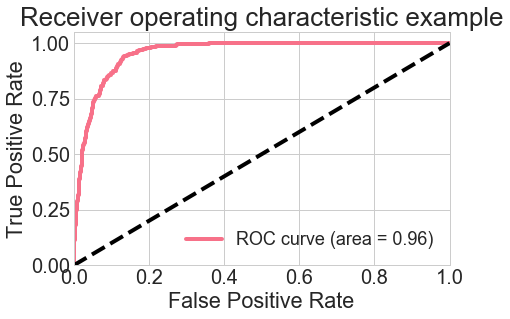

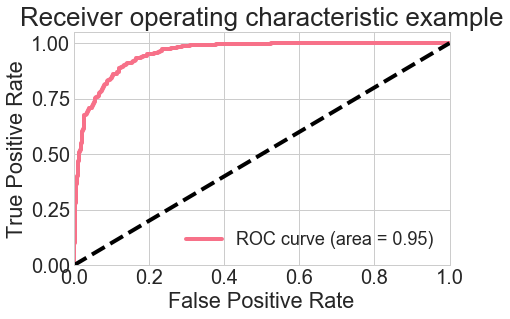

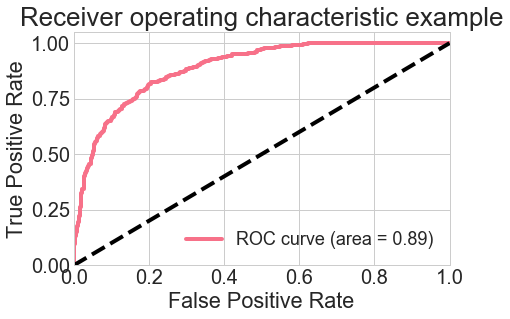

In [104]:
y_train_ordinal2 = [probecard_dict[i] for i in y_train2]
y_test_ordinal2 = [probecard_dict[i] for i in y_test2]
y_train22=label_binarize(y_train_ordinal2, classes=[0,1,2,3])
y_test22=label_binarize(y_test_ordinal2, classes=[0,1,2,3])


# classifier
clf = OneVsRestClassifier(LogisticRegression(C=C_parameter))

y_score2 = clf.fit(X_train2, y_train22).decision_function(X_test2)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test22[:, i], y_score2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Multinomial Logistic Regression with LDA  dimensionality reduction classifier 

### Linear discriminant  analysis is a supervised technique that  selects  the directions of maximum dicrimination
### 1) select the LDA components
### 2) train , test and split 
### 3) select Logistic Regression to train , predict and score
### 4) use cross_val_score to get the min mse for K value
### 5) plot confusion report to check for balance set
### 6) plot the classification report for overfit and underfit cases



In [105]:
lda = LinearDiscriminantAnalysis().fit(X_normalised, y)
print (lda)
lda_= lda.fit_transform(X_normalised, y)
print (lda_)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
[[-1.36904825  3.87836494  0.73735339]
 [-2.65007768  3.98023413 -0.43372998]
 [-3.22787394  2.98357032 -1.16482351]
 ...
 [ 2.39919235  0.30844814 -0.32149909]
 [ 0.82273865  1.51672828 -0.79504122]
 [ 1.74352925  0.13049237 -1.45118041]]


## Plotting the LDA principal components 1 to 3




LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


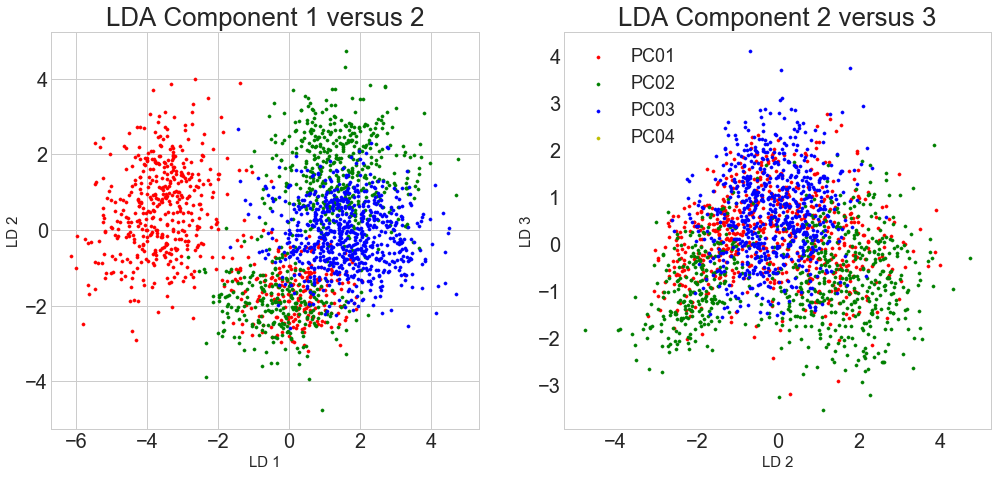

In [106]:

#x = StandardScaler().fit_transform(copydf_sd.loc[:,features])
#print (X.info)
#Y = np.ravel(df_probecard)
#print (y)
y = copydf_sd['Probecard']
lda = LinearDiscriminantAnalysis(n_components=3).fit(X_normalised, y)
print (lda)
lda_= lda.fit_transform(X_normalised, y)
principalDf = pd.DataFrame(data = lda_, columns =['LD1','LD2','LD3'])

finalDf = pd.concat([principalDf, y],axis=1 )

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
ax.set_xlabel('LD 1',fontsize =15)
ax.set_ylabel('LD 2',fontsize =15)
targets = ['PC01','PC02','PC03','PC04']
colors = [ 'r','g','b','y']
for target , color in zip(targets, colors):
        indicesToKeep = finalDf['Probecard'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'LD1']
                   , finalDf.loc[indicesToKeep, 'LD2']
                   , c = color
                   , s = 10)
ax.set_title('LDA Component 1 versus 2')
ax = fig.add_subplot(2,2,2)
ax.set_xlabel('LD 2',fontsize =15)
ax.set_ylabel('LD 3',fontsize =15)
targets = ['PC01','PC02','PC03','PC04']
colors = [ 'r','g','b','y']
for target , color in zip(targets, colors):
        indicesToKeep = finalDf['Probecard'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'LD2']
                   , finalDf.loc[indicesToKeep, 'LD3']
                   , c = color
                   , s = 10)
ax.legend(targets)
ax.set_title('LDA Component 2 versus 3')
ax.grid()





## Plotting the variances of the LDA components 




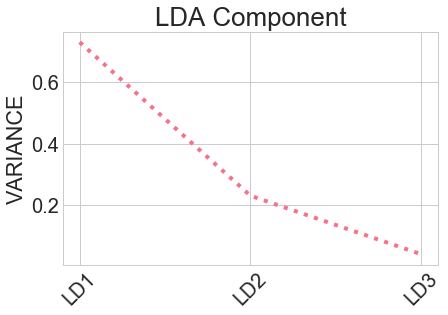

                      LD1     LD2     LD3
ExplainedVariance  0.7295  0.2304  0.0401


In [107]:
def proportion_of_trace(lda):
    lda1 = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    lda1.index = ["LD"+str(i+1) for i in range(lda1.shape[0])]
    lda1 = lda1.transpose()
    plt.plot(lda1.columns, lda.explained_variance_ratio_, ":")
    x_lda = np.arange(len(lda1.columns)) 
    plt.xticks(x_lda, ["LD"+str(i+1) for i in x_lda], rotation=45) 
    plt.ylabel("VARIANCE")
    plt.title("LDA Component")
    plt.show()
    return (lda1)

lda_value = proportion_of_trace(LinearDiscriminantAnalysis(solver="eigen").fit(X, y))



print (lda_value)


## Plotting the LDA  coefficients of the independent variables ( data features )




In [108]:
lda_coeff = lda.scalings_

print ("The lda component are as follows : \n")
index_p =  ["lda_component " + str(i)  for i in range(1,lda.scalings_.shape[1]+1)]

df4 = pd.DataFrame(lda.scalings_, index=selected_indep_variables, columns = index_p)
df4

The lda component are as follows : 



,lda_component 1,lda_component 2,lda_component 3
Temp_coeff,-0.005679,-2.326408,-1.037234
Freq1,0.573592,-1.456086,1.067972
Propagation_delay,-1.258037,1.068504,-0.126602
Freq2,-1.749572,-0.821278,-1.005697
Test_time,0.446737,0.210459,1.111612
Resistance,1.338229,-0.325939,-0.950365
Power_supply,0.507533,1.441393,0.365962


## Perform logistic regression using LDA as dimensional reduction classifier.




In [109]:
from sklearn.svm import SVC
C_parameters = [i for i in range(1,21)]
score_list =[]
y = np.ravel(y)

for C_parameter in C_parameters :
    
        # #############################################################################
        # Compute a LDA (eigenfaces) on the face dataset (treated as unlabeled
        # dataset): unsupervised feature extraction / dimensionality reduction
        
    lda = LinearDiscriminantAnalysis(solver='svd',n_components =3)
    lda.fit(X_train1, y_train1)
    X_train1 = lda.transform(X_train1)
    X_test1 = lda.transform(X_test1) 
        #logisticRegr = LogisticRegression(solver = 'lbfgs')
                                      
    modelCV = LogisticRegression(solver = 'lbfgs',C=C_parameter)
    kfold = model_selection.KFold(n_splits=10, random_state=99)
    
    scoring = 'accuracy'
    
    results = model_selection.cross_val_score(modelCV, X_train1, y_train1, cv=kfold, scoring=scoring)
    print("10-fold cross validation average accuracy: %.5f" % (results.mean()) , " for C parameter = ", C_parameter)
    score_list.append(results.mean())

print ("\n The best score is :", '{:.2f}'.format(max(score_list)*100)+"%" , " with C parameter = ",C_parameters[score_list.index(max(score_list))])


modelCV = LogisticRegression(solver = 'lbfgs',C=C_parameters[score_list.index(max(score_list))])
modelCV.fit(X_train1, y_train1)


    
    

10-fold cross validation average accuracy: 0.83530  for C parameter =  1
10-fold cross validation average accuracy: 0.83598  for C parameter =  2
10-fold cross validation average accuracy: 0.83598  for C parameter =  3
10-fold cross validation average accuracy: 0.83598  for C parameter =  4
10-fold cross validation average accuracy: 0.83667  for C parameter =  5
10-fold cross validation average accuracy: 0.83667  for C parameter =  6
10-fold cross validation average accuracy: 0.83667  for C parameter =  7
10-fold cross validation average accuracy: 0.83667  for C parameter =  8
10-fold cross validation average accuracy: 0.83667  for C parameter =  9
10-fold cross validation average accuracy: 0.83598  for C parameter =  10
10-fold cross validation average accuracy: 0.83598  for C parameter =  11
10-fold cross validation average accuracy: 0.83667  for C parameter =  12
10-fold cross validation average accuracy: 0.83667  for C parameter =  13
10-fold cross validation average accuracy: 0.83

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

## Use the chosen C_parameter to predict the test set and obtain the lda score





 The test score is :  84.77% 

             precision    recall  f1-score   support

       PC01       0.98      0.98      0.98       319
       PC02       0.83      0.91      0.87       346
       PC03       0.87      0.78      0.82       406
       PC04       0.73      0.75      0.74       380

avg / total       0.85      0.85      0.85      1451



,Predicted as PC01,Predicted as PC02,Predicted as PC03,Predicted as PC04
Actual PC01,313,4,0,2
Actual PC02,2,315,2,27
Actual PC03,3,11,316,76
Actual PC04,0,49,45,286


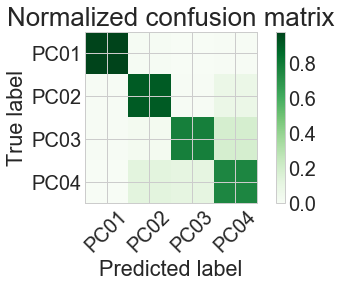

In [110]:
y_pred = modelCV.predict(X_test1)
lda_score =  modelCV.score(X_test1, y_test1)
print ( "\n The test score is : ",'{:.2f}'.format(lda_score*100.)+"%" ,"\n")


confusion_mat = confusion_matrix(y_test1, y_pred)

print(metrics.classification_report(y_test1, y_pred))
  
print_confusion_matrix(confusion_mat, probecard_names)
confusion_mat_normalized = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(confusion_mat_normalized, probecard_names, title='Normalized confusion matrix')



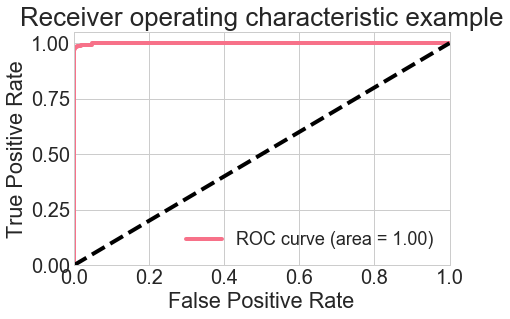

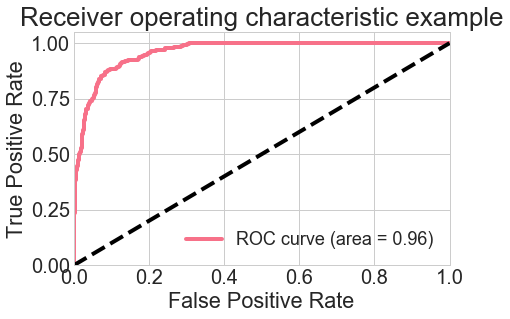

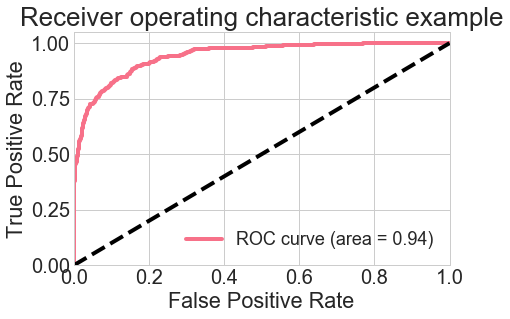

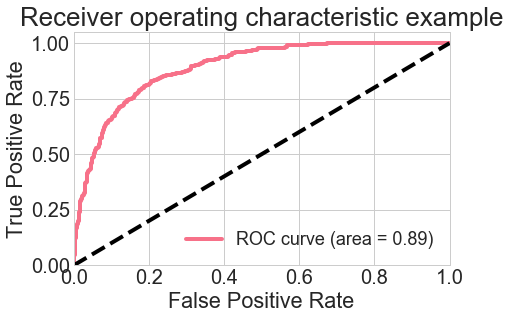

In [111]:
y_train_ordinal1 = [probecard_dict[i] for i in y_train1]
y_test_ordinal1 = [probecard_dict[i] for i in y_test1]
y_train11=label_binarize(y_train_ordinal1, classes=[0,1,2,3])
y_test11=label_binarize(y_test_ordinal1, classes=[0,1,2,3])


# classifier
clf = OneVsRestClassifier(LogisticRegression(C=C_parameter))

y_score1 = clf.fit(X_train1, y_train11).decision_function(X_test1)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test22[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Comparision between Logistic Regression (W/O dimensional classifier, PCA and LDA )




In [112]:
from sklearn.linear_model import LogisticRegression
Y=df.loc[:,['Probecard']].values


Y = np.ravel(Y)

def pca_test1(n_component,train_subj , test_subj, train_target, test_target,test_flag):
    pca = PCA(n_components=n_component)
    pca.fit(train_subj)
    train_subj =(pca.transform(train_subj))
    test_subj =  (pca.transform(test_subj))
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(train_subj, train_target)
    #logisticRegr.predict(test_img[0].reshape(1,-1))
    logisticRegr.predict(test_subj)
    if test_flag:
        return (logisticRegr.score(test_subj,test_target))
    else:
        return (logisticRegr.score(train_subj,train_target))

def lda_test1(n_component,train_subj , test_subj, train_target, test_target,test_flag):

    lda = LinearDiscriminantAnalysis(solver='eigen',n_components = n_component)
    lda.fit(train_subj, train_target)
    train_subj = lda.transform(train_subj)
    test_subj = lda.transform(test_subj)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(train_subj, train_target)
    logisticRegr.predict(test_subj)
    if test_flag:
        return (logisticRegr.score(test_subj,test_target))
    else:
        return (logisticRegr.score(train_subj,train_target))
   
def log_reg(n_component,train_subj , test_subj, train_target, test_target,test_flag):

    Log_Reg = LogisticRegression(solver='lbfgs')

    Log_Reg.fit(train_subj, train_target)
    Log_Reg.predict(test_subj)
    if test_flag:
        return (Log_Reg.score(test_subj,test_target))
    else:
        return (Log_Reg.score(train_subj,train_target))
pca_accuracy=[]
lda_accuracy=[]
pca_accuracy1=[]
lda_accuracy1=[]
nc_accuracy=[]
nc_accuracy1=[]

for i in range(1,(X.shape[1])):
    train_img , test_img, train_lbl, test_lbl = train_test_split(X, y,test_size = 1/5.0, random_state=99)
    pca_accuracy.append(pca_test1(i,train_img , test_img, train_lbl, test_lbl ,0)*100)
    lda_accuracy.append(lda_test1(i,train_img , test_img, train_lbl, test_lbl ,0)*100)
    nc_accuracy.append(log_reg(i,train_img , test_img, train_lbl, test_lbl ,0)*100)
    nc_accuracy1.append(log_reg(i,train_img , test_img, train_lbl, test_lbl ,1)*100)

    pca_accuracy1.append(pca_test1(i,train_img , test_img, train_lbl, test_lbl ,1)*100)

    lda_accuracy1.append(lda_test1(i,train_img , test_img, train_lbl, test_lbl ,1)*100)
    
def probecard_performance(pca_accuracy,lda_accuracy,pca_accuracy1,lda_accuracy1):
    names = ["Number of items selected : "+str(i) for i in range(1,X.shape[1])]
    item1 = pca_accuracy
  
    item2 = lda_accuracy
    item4 = pca_accuracy1
  
    item5 = lda_accuracy1
    item3 = nc_accuracy
  
    item6 = nc_accuracy1

    
    column1 = pd.MultiIndex.from_tuples([ ("PCA", " Trained Accuracy"), ("LDA","Trained Accuracy"),("NC","Trained Accuracy"),
                                         ("PCA", "Test Accuracy"),("LDA","Test Accuracy"),("NC","Test Accuracy")])

    probecard_table =pd.DataFrame(np.column_stack([item1, item2,item3, item4,item5, item6] ),index=names,columns= column1)
   
    print("Probecard Match")
    display(probecard_table)
    return probecard_table

print (" Note **** : Number of items are referring to the respective methods :")
print (" Principal components for PCA")
print (" Linear Discriminant items for LDA ")
print (" The number of items is not applicable to Logistic Regression \n")
pca_lda_result = probecard_performance(pca_accuracy,lda_accuracy,pca_accuracy1,lda_accuracy1)




 Note **** : Number of items are referring to the respective methods :
 Principal components for PCA
 Linear Discriminant items for LDA 
 The number of items is not applicable to Logistic Regression 

Probecard Match


,PCA,LDA,NC,PCA,LDA,NC
,Trained Accuracy,Trained Accuracy,Trained Accuracy,Test Accuracy,Test Accuracy,Test Accuracy
Number of items selected : 1,37.914692,62.429987,86.686773,40.447504,60.757315,88.640275
Number of items selected : 2,51.314089,81.559673,86.686773,55.077453,83.993115,88.640275
Number of items selected : 3,70.831538,83.412322,86.686773,71.772806,85.714286,88.640275
Number of items selected : 4,78.112882,83.412322,86.686773,79.690189,85.714286,88.640275
Number of items selected : 5,85.178802,83.412322,86.686773,88.640275,85.714286,88.640275
Number of items selected : 6,85.609651,83.412322,86.686773,86.574871,85.714286,88.640275


# Conclusion




In [113]:
linear_transform_list = ["K-Nearest-Neighbors KNN","Multinomial Logistic Regression with no dimensional reduction feature",
                        "Multinomial Logistic Regression with Principal Component Analysis","Multinomial Logistic Regression with Linear Discrimination Analysis"]
scores = [knn_score, nc_score, pca_score, lda_score]

score_list = [ '{:.2f}'.format(i*100)+"%" for i in scores]

df5 = pd.DataFrame(score_list, index = linear_transform_list, columns =["Score"])
df5

,Score
K-Nearest-Neighbors KNN,97.86%
Multinomial Logistic Regression with no dimensional reduction feature,87.59%
Multinomial Logistic Regression with Principal Component Analysis,86.70%
Multinomial Logistic Regression with Linear Discrimination Analysis,84.77%


## Program weakness
My program will not be able to perform appropriately if most of the independent variables have polynomial or non-linear data characteristics . Support vector machines (SVM) or Decision Tree Forest would be better alternative if there are many independent variables  with  non-linear parametric  features.


# Conclusion

In this project , I had use the following classification methods :   KNN and  Multinomial logistic regression ( PCA , LDA ) to establish the probecard identity and     observe   KNN performs well in terms of score but it tends to incur high memory and computational costs.

Multinomial Logistic Regression with PCA and LDA  perform almost on par with the one without any dimensional reduction techniques , both the PCA and LDA techniques are able to reduce the number of  multidimensional data to lower dimensional space by linear mapping while retaining most of the information. 

The disadvantage of PCA lies in the need to normalise the feature data , otherwise the info obtained will be biased towards those feature with bigger variance content.
The disadvantage of LDA , its application  will fail when discriminatory info is not in the mean but rather in the variance of the data

Name of transformation | Score
---|---
K-Nearest-Neighbors KNN	| 97.86% 
Multinomial Logistic Regression with no dimensional reduction feature	| 87.59% 
Multinomial Logistic Regression with Principal Component Analysis	| 86.70%
Multinomial Logistic Regression with Linear Discrimination Analysis	| 84.77


Thank you !

Peter Yip (PY)
